<a href="https://colab.research.google.com/github/RMCV-Rajapaksha/TeamInception_Datathon/blob/akila/task2_eda_and_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Notebook for "insert model name here"


## Imports and Setup

**Import the Libararies**


In [1]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting to Google Drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


### Reading data set files

In [4]:
# Developers please update the paths according to were in your google you place datasets
# i recommend making Rootcode-ML folder and in it Datasets folder and placing the csv files there then you wont have to change below code block
bookings_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/bookings_train.csv')
tasks_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/tasks.csv')
staffing_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/staffing_train.csv')

In [5]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


## EDA


### EDA of Bookings data

lets take a look at the columns and some of their values

In [6]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [7]:
staffing_data.describe()

,employees_on_duty,total_task_time_minutes
count,5802.000000,5802.000000
mean,4.458807,1662.296769
std,2.794417,1147.134643
min,1.000000,91.109596
25%,3.000000,859.104314
50%,4.000000,1358.176924
75%,6.000000,2123.936358
max,26.000000,10658.173092


removing unnecessary columns. We wont need the total_task_time_minutes because this data wont be provided as input from the test datasets. We need the date and section_id  because they will be to calculate the actual target value (the thing to be predicted) for task 2.

In [8]:
staffing_data = staffing_data.drop(['total_task_time_minutes'],axis=1)

now lets look at the new table headers again.


In [9]:
staffing_data.head()

,date,section_id,employees_on_duty
0,2021-01-01,SEC-001,1
1,2021-01-01,SEC-002,4
2,2021-01-01,SEC-003,2
3,2021-01-01,SEC-004,4
4,2021-01-01,SEC-005,3


lets get a better idea of how null values have been distributed amoung the columns

In [10]:
staffing_data.isna().sum()

,0
date,0
section_id,0
employees_on_duty,0


## Data Preprocessing


### Rearrangement and processing of columns

### Dataset seperation according to section_id

In [11]:
task_counts = staffing_data.groupby("section_id").size().reset_index(name="count")
task_counts

,section_id,count
0,SEC-001,967
1,SEC-002,967
2,SEC-003,967
3,SEC-004,967
4,SEC-005,967
5,SEC-006,967


In [12]:
sec_1_data = staffing_data[staffing_data['section_id'] == 'SEC-001'].copy()
sec_2_data = staffing_data[staffing_data['section_id'] == 'SEC-002'].copy()
sec_3_data = staffing_data[staffing_data['section_id'] == 'SEC-003'].copy()
sec_4_data = staffing_data[staffing_data['section_id'] == 'SEC-004'].copy()
sec_5_data = staffing_data[staffing_data['section_id'] == 'SEC-005'].copy()
sec_6_data = staffing_data[staffing_data['section_id'] == 'SEC-006'].copy()


In [13]:
sec_6_data.head()

,date,section_id,employees_on_duty
5,2021-01-01,SEC-006,11
11,2021-01-04,SEC-006,6
17,2021-01-05,SEC-006,5
23,2021-01-06,SEC-006,10
29,2021-01-07,SEC-006,5


Check missing values across all section datasets

In [14]:
print("Null values in SEC-001:\n", sec_1_data.isna().sum())
print("Null values in SEC-002:\n", sec_2_data.isna().sum())
print("Null values in SEC-003:\n", sec_3_data.isna().sum())
print("Null values in SEC-004:\n", sec_4_data.isna().sum())
print("Null values in SEC-005:\n", sec_5_data.isna().sum())
print("Null values in SEC-006:\n", sec_6_data.isna().sum())

Null values in SEC-001:
 date                 0
section_id           0
employees_on_duty    0
dtype: int64
Null values in SEC-002:
 date                 0
section_id           0
employees_on_duty    0
dtype: int64
Null values in SEC-003:
 date                 0
section_id           0
employees_on_duty    0
dtype: int64
Null values in SEC-004:
 date                 0
section_id           0
employees_on_duty    0
dtype: int64
Null values in SEC-005:
 date                 0
section_id           0
employees_on_duty    0
dtype: int64
Null values in SEC-006:
 date                 0
section_id           0
employees_on_duty    0
dtype: int64


# Convert date to datetime and extract useful features (day, month, weekday)


In [20]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Calculate completion time in minutes
bookings_data['check_in_time'] = pd.to_datetime(bookings_data['check_in_time'])
bookings_data['check_out_time'] = pd.to_datetime(bookings_data['check_out_time'])
bookings_data['completion_time_minutes'] = (bookings_data['check_out_time'] - bookings_data['check_in_time']).dt.total_seconds() / 60

# Define features and target for Task 1
# Using numerical and encoded categorical features that might influence completion time
# citizen_id is likely not a useful feature for predicting completion time across all citizens
features_task1 = ['num_documents', 'queue_number', 'satisfaction_rating']
target_task1 = 'completion_time_minutes'

# Drop rows with missing target
bookings_data = bookings_data.dropna(subset=[target_task1])

# Select the relevant columns for scaling
data_to_scale = bookings_data[features_task1 + [target_task1]]

# Scale the data
scaler_task1 = MinMaxScaler()
scaled_task1 = scaler_task1.fit_transform(data_to_scale)

def create_sequences(data, window=14):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window, :-1])  # past features
        y.append(data[i+window, -1])    # target at next step
    return np.array(X), np.array(y)

# Create sequences using the scaled data
X_task1, y_task1 = create_sequences(scaled_task1, window=14)

print("X_task1 shape:", X_task1.shape)  # (samples, timesteps, features)
print("y_task1 shape:", y_task1.shape)

X_task1 shape: (197587, 14, 3)
y_task1 shape: (197587,)


Plot distributions to understand task patterns

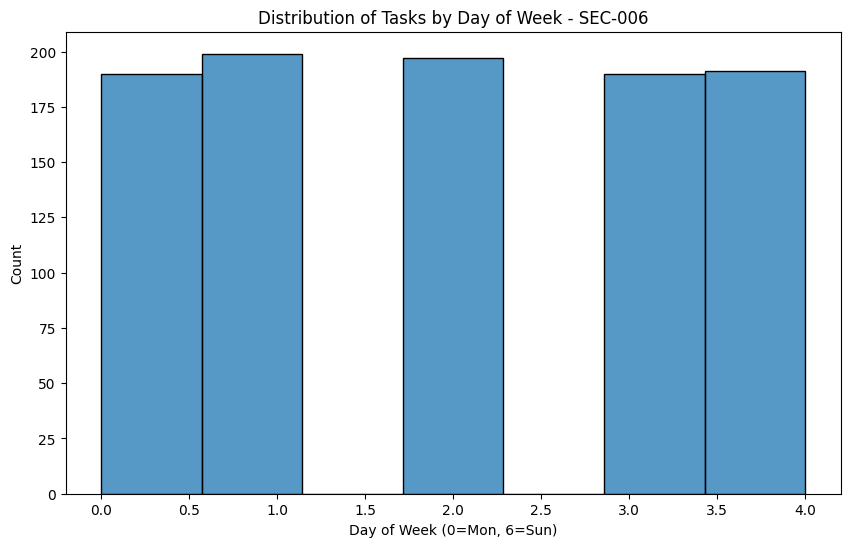

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(sec_6_data['day_of_week'], bins=7, kde=False)
plt.title("Distribution of Tasks by Day of Week - SEC-006")
plt.xlabel("Day of Week (0=Mon, 6=Sun)")
plt.ylabel("Count")
plt.show()

Select Features & Target for Modeling
# We will predict "total_task_time_minutes" (removed earlier for Task 2).
# Here, we show setup for Task 1 (predict completion time)

In [22]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode section_id for completeness
le = LabelEncoder()
staffing_data['section_id_encoded'] = le.fit_transform(staffing_data['section_id'])

# Example features
features = ['day_of_week','month','section_id_encoded']
# target = 'expected_completion_time_minutes'  # <-- Task 1 target (not in this dataset)

# Drop rows with missing target if any
# bookings_data = bookings_data.dropna(subset=[target])

scaler = MinMaxScaler()
# scaled = scaler.fit_transform(bookings_data[features + [target]]) # This line will cause an error, as 'target' is not defined

Create Sequences for LSTM (Time Series Windowing)

In [24]:
import numpy as np

def create_sequences(data, window=14):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window, :-1])  # past features
        y.append(data[i+window, -1])    # target at next step
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_task1, window=14)
print("X shape:", X.shape)  # (samples, timesteps, features)
print("y shape:", y.shape)

X shape: (197587, 14, 3)
y shape: (197587,)


Build & Train LSTM Model

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dense(1)  # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

history = model.fit(
    X, y,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 14, 128)        │        67,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,057 (457.25 KB)

 Trainable params: 117,057 (457.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 166s 33ms/step - loss: 0.0136 - mae: 0.0884 - val_loss: 0.0108 - val_mae: 0.0810
Epoch 2/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 152s 31ms/step - loss: 0.0131 - mae: 0.0868 - val_loss: 0.0113 - val_mae: 0.0853
Epoch 3/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 212s 33ms/step - loss: 0.0130 - mae: 0.0868 - val_loss: 0.0109 - val_mae: 0.0831
Epoch 4/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 193s 31ms/step - loss: 0.0130 - mae: 0.0863 - val_loss: 0.0111 - val_mae: 0.0844
Epoch 5/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 212s 33ms/step - loss: 0.0130 - mae: 0.0865 - val_loss: 0.0109 - val_mae: 0.0832
Epoch 6/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 200s 33ms/step - loss: 0.0130 - mae: 0.0865 - val_loss: 0.0112 - val_mae: 0.0856
Epoch 7/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 190s 30ms/step - loss: 0.0131 - mae: 0.0868 - val_loss: 0.0112 - val_mae: 0.0854
Epoch 8/30
4940/4940 ━━━━━━━━━━━━━━━━━━━━ 203s 31ms/step - loss: 0.0130 - mae: 0.0865 - val_loss: 0.0111 - val_mae: 0.0844
Epoch 9/30
4940/

Evaluate Model Performance

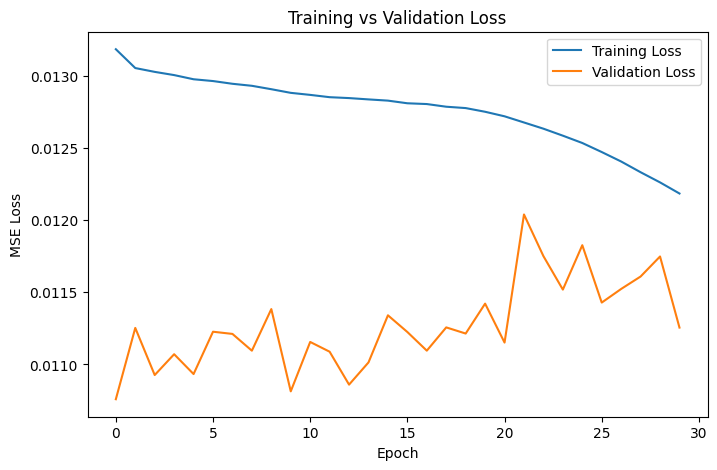

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

Test Prediction on Latest Sequences


In [28]:
preds = model.predict(X[-10:])
# Rescale back
preds_rescaled = scaler_task1.inverse_transform(
    np.concatenate([np.zeros((preds.shape[0], scaled_task1.shape[1]-1)), preds], axis=1)
)[:,-1]

print("Predicted Completion Times (minutes):", preds_rescaled)
print("Actual Completion Times (minutes):", scaler_task1.inverse_transform(scaled_task1)[-10:,-1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted Completion Times (minutes): [49.22791968 49.88090305 51.0173925  49.95245004 50.80360017 51.29217912
 49.80500249 49.00884942 48.33666298 47.70347262]
Actual Completion Times (minutes): [ 31.41870902  38.43724417  41.91248512  51.76506243  48.99614129
  24.60729514 107.66924921  78.01421627  86.06127759  33.46112438]
